### Loan Prediction Problem

###### Context:
Dream Housing Finance Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

###### Source:
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [3]:
#import packages like pandas,numpy,matplotlib,seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing training data from csv stored in the local machine
df=pd.read_csv("train.csv")

In [5]:
#Displaying first 5 rows of training data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
#Description of all the features which have numerical data and target.
df.describe(percentiles=[0.01,0.25,0.50,0.75,0.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
1%,1025.000000,0.000000,30.000000,84.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#Shape of the dataset
df.shape

(614, 13)

In [9]:
#Number of rows in the dataset
len(df.index)

614

## Data Cleaning

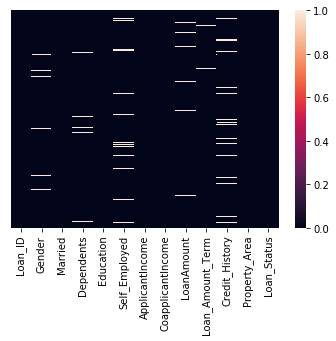

In [10]:
#Visualising null values through heatmap
sns.heatmap(df.isnull(),yticklabels=False)

In [11]:
#Finding sum of null values in all columns
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Check if all the entries within a particular column are null
df.isnull().all() 

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [13]:
#Check if all the entries within a row are null so that we can delete the entire row
df.isnull().all(axis=1).sum()

0

In [14]:
#sum of missing values in each row
df.isnull().sum(axis=1)

0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     0
15     0
16     1
17     0
18     0
19     2
20     0
21     0
22     0
23     1
24     2
25     0
26     0
27     0
28     0
29     1
      ..
584    0
585    0
586    0
587    0
588    1
589    0
590    0
591    0
592    1
593    0
594    0
595    0
596    0
597    1
598    0
599    0
600    2
601    1
602    0
603    0
604    0
605    1
606    0
607    0
608    0
609    0
610    0
611    0
612    0
613    0
Length: 614, dtype: int64

In [15]:
#percentage of missing values in a column
round(100*(df.isnull().sum())/len(df.index),2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [16]:
# count the number of rows having > 3 missing values
# use len(df.index)
len(df[df.isnull().sum(axis=1) > 3].index)

0

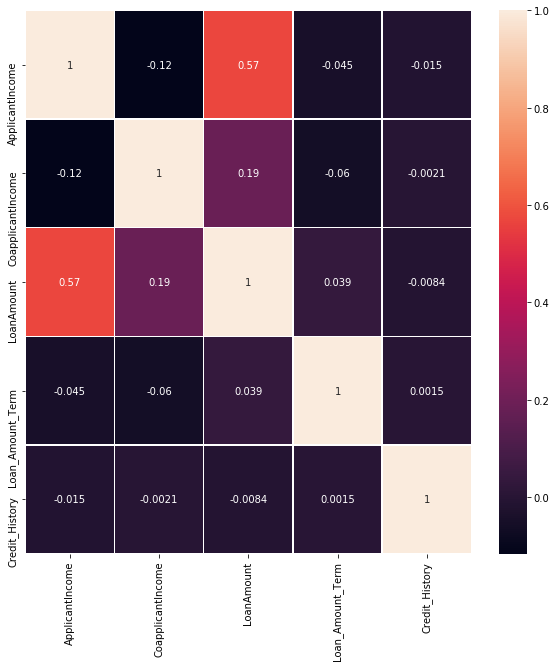

In [17]:
#Correlation Matrix
fig,ax = plt.subplots(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,ax=ax,annot=True,linewidth=.5)

In [18]:
#Deleting those rows in which value of credit history is null
df=df[~np.isnan(df['Credit_History'])]

In [19]:
round(100*(df.isnull().sum())/len(df.index),2)

Loan_ID              0.00
Gender               2.13
Married              0.53
Dependents           2.66
Education            0.00
Self_Employed        4.61
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.72
Loan_Amount_Term     2.48
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [20]:
len(df.index)#50 rows in which credit hist was null have been removed

564

In [21]:
#Dropping those rows in which LoanAmount value is null
df.dropna(subset=['LoanAmount'],axis=0,how='all',inplace=True)

In [22]:
round(100*(df.isnull().sum())/len(df.index),2)

Loan_ID              0.00
Gender               2.21
Married              0.37
Dependents           2.39
Education            0.00
Self_Employed        4.79
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     2.58
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [23]:
len(df.index) 
#22 rows should have been removed but only 21 have been removed.This may be because one row might already have been removed which contained null values of Credit_History and Loan_Amount

543

In [24]:
#Dropping those rows in which Self_Emloyed value is null
df.dropna(subset=['Self_Employed'],how='all',inplace=True,axis=0)

In [25]:
round(100*(df.isnull().sum())/len(df.index),2)

Loan_ID              0.00
Gender               2.32
Married              0.39
Dependents           2.51
Education            0.00
Self_Employed        0.00
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     2.51
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [26]:
len(df.index) #32 should have been removed but only 26 have been removed since rest should have been removed earlier

517

In [27]:
#Dependents and Credit History have same percentage of missing values

#Now depending upon the business take decisions whether to delete the data or impute it with their mean
#so that there should be no tremendous amount of data loss.
#We will impute the data with maximum frequency i.e 360

df['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [28]:
round(100*(df.isnull().sum())/len(df.index),2)

Loan_ID              0.00
Gender               2.32
Married              0.39
Dependents           2.51
Education            0.00
Self_Employed        0.00
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     0.00
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [29]:
len(df.index)

517

In [30]:
#Dropping those rows in which Dependents value is null
df.dropna(subset=['Dependents'],how='all',inplace=True,axis=0)

In [31]:
round(100*(df.isnull().sum())/len(df.index),2)

Loan_ID              0.00
Gender               2.38
Married              0.00
Dependents           0.00
Education            0.00
Self_Employed        0.00
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     0.00
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [32]:
len(df.index) #13 rows have been deleted in which dependents was null(Aise toh 15 the.....')'Iske saath saath married wale null bhi nikal gaye'

504

In [33]:
df.dropna(subset=['Gender'],how='all',inplace=True,axis=0)

In [34]:
len(df.index) #12 rows have been deleted in which Gender was null(Aise toh 13 the...'')'1 ne toh pehle hi balidan de diya'

492

In [35]:
round(100*(df.isnull().sum())/len(df.index),2)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

### All the null values have been removed

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [37]:
df.shape #Data has been cleaned and it has come a long way 614-122=492 rows

(492, 13)

In [38]:
"""It can be seen that applicant and coapplicant income can be combined together as both of them combined together will have
effect on the model"""

df['Combined_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [39]:
#Dropping Applicant and Coapplicant Income
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)


In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0


## EDA And Visualisation

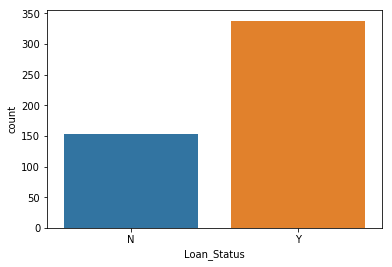

In [41]:
#Count of Loan_Status
sns.countplot(df['Loan_Status']) #Seems to be a bit imbalanced dataset

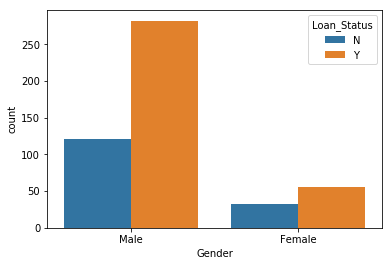

In [42]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])

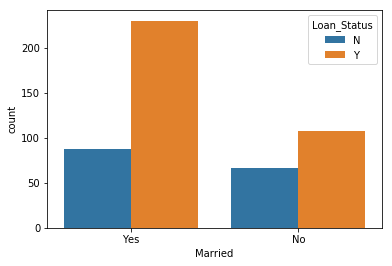

In [43]:
sns.countplot(df['Married'],hue=df['Loan_Status'])

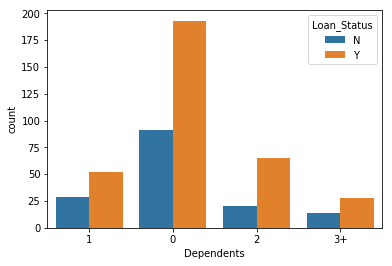

In [44]:
sns.countplot(df['Dependents'],hue=df['Loan_Status'])

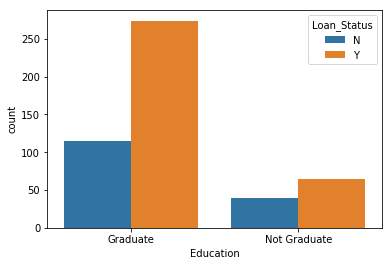

In [45]:
sns.countplot(df['Education'],hue=df['Loan_Status'])

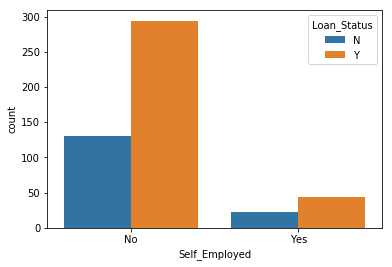

In [46]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

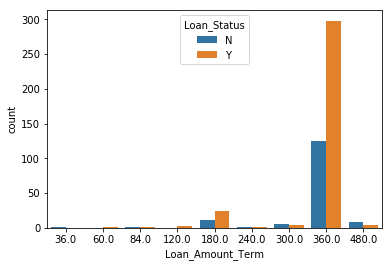

In [47]:
sns.countplot(df['Loan_Amount_Term'],hue=df['Loan_Status'])

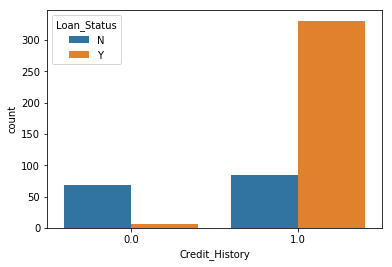

In [48]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])

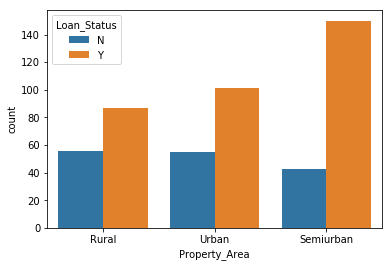

In [49]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

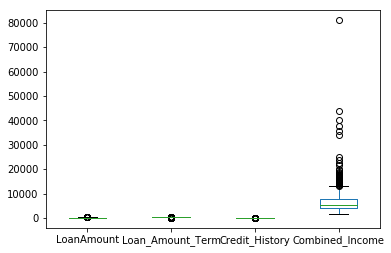

In [50]:
df.plot.box()

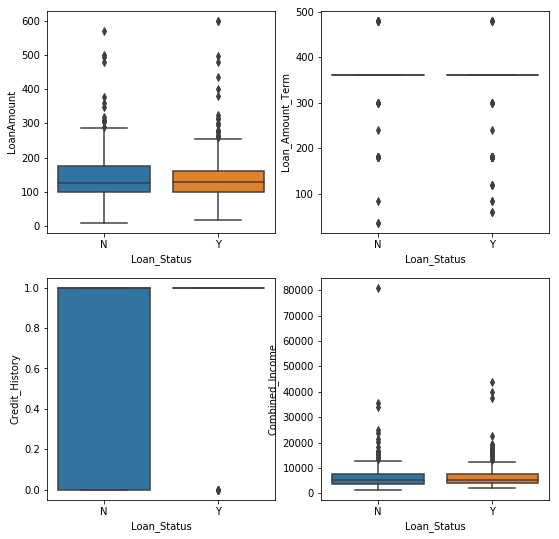

In [51]:
#Univariate Analysis
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
sns.boxplot(x=df['Loan_Status'],y=df['LoanAmount'])
plt.subplot(2,2,2)
sns.boxplot(x=df['Loan_Status'],y=df['Loan_Amount_Term'])
plt.subplot(2,2,3)
sns.boxplot(x=df['Loan_Status'],y=df['Credit_History'])
plt.subplot(2,2,4)
sns.boxplot(x=df['Loan_Status'],y=df['Combined_Income'])

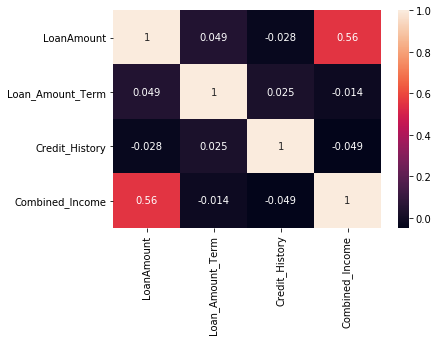

In [52]:
corr=df.corr()
sns.heatmap(corr,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BFF20FEB38>,
      dtype=object)

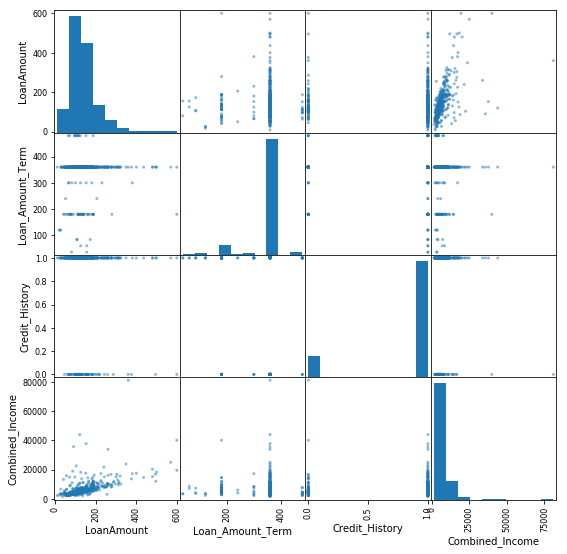

In [53]:
pd.plotting.scatter_matrix(df,figsize=(9,9))

# Building a Logistic Regression Model to determine whether the loan is approved or not

In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0


In [55]:
df.shape

(492, 12)

In [56]:
#Reading the test data and storing it to the variable df_test
df_test=pd.read_csv("test.csv")

In [57]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [58]:
df_test.shape

(367, 12)

In [59]:
df_test["Combined_Income"]=df_test["ApplicantIncome"] + df_test["CoapplicantIncome"]

In [60]:
df_test.drop(columns=['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [61]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combined_Income
0,LP001015,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,100.0,360.0,NaN,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,78.0,360.0,1.0,Urban,3276


In [62]:
#Checking if there are any null values in the test data columnwise
df_test.isnull().sum()

Loan_ID              0
Gender              11
Married              0
Dependents          10
Education            0
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
Property_Area        0
Combined_Income      0
dtype: int64

### Filling the null values in columns with the frequency of the respective columns

In [63]:
df_test['Gender'].fillna(df_test['Gender'].mode()[0],axis=0,inplace=True)

In [64]:
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],axis=0,inplace=True)

In [65]:
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],axis=0,inplace=True)

In [66]:
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mode()[0],axis=0,inplace=True)

In [67]:
df_test['Loan_Amount_Term'].fillna(df_test['LoanAmount'].mode()[0],axis=0,inplace=True)

In [68]:
df_test['Credit_History'].fillna(df_test['LoanAmount'].mode()[0],axis=0,inplace=True)

In [69]:
#Displaying last 5 rows of the Training Data
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0
613,LP002990,Female,No,0,Graduate,Yes,133.0,360.0,0.0,Semiurban,N,4583.0


In [70]:
#Displaying first 5 rows of the Test Data
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combined_Income
0,LP001015,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,100.0,360.0,150.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,78.0,360.0,1.0,Urban,3276


In [71]:
#Reindexing the columns of the test data so that target becomes the last column
columnsTitles = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Combined_Income','Loan_Status']

df = df.reindex(columns=columnsTitles)

In [72]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combined_Income,Loan_Status
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,2900.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,4106.0,Y
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,8312.0,Y
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,7583.0,Y
613,LP002990,Female,No,0,Graduate,Yes,133.0,360.0,0.0,Semiurban,4583.0,N


In [73]:
#Merging the Training and Testing data so that we can do One Hot Encoding on the whole dataset to avoid the errors
df_final=pd.concat([df,df_test],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [74]:
df_final.head()

,Combined_Income,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
1,6091.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,4941.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
5,9613.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes


In [75]:
#Reindexing the columns in the final dataset
columnsTitles = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Combined_Income','Loan_Status']

df_final = df_final.reindex(columns=columnsTitles)

In [76]:
df_final.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combined_Income,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0,Y
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0,Y
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,9613.0,Y


In [77]:
#Storing this final dataset to the file "Combined.csv"
df_final.to_csv("Combined.csv")

In [78]:
#Displaying the names of columns which have categorical values
df_final.select_dtypes(include=object).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [79]:
#Dropping the column Loan_ID because it is not useful in predicting the loan status
df_final.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [80]:
df_final.shape

(859, 11)

In [81]:
#One Hot Encoding on all the columns which have categorical values
df_final=pd.get_dummies(df_final,columns=df_final.select_dtypes(include=object).columns,drop_first=True)

In [82]:
df_final.shape

(859, 14)

In [83]:
#Storing this dataset with all the records converted into numerical format to the file "combined_dummy.csv"
df_final.to_csv("combined_dummy.csv")

In [84]:
df_final.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Combined_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0,0
2,66.0,360.0,1.0,3000.0,1,1,0,0,0,0,1,0,1,1
3,120.0,360.0,1.0,4941.0,1,1,0,0,0,1,0,0,1,1
4,141.0,360.0,1.0,6000.0,1,0,0,0,0,0,0,0,1,1
5,267.0,360.0,1.0,9613.0,1,1,0,1,0,0,1,0,1,1


In [85]:
#Checking if there are any null values
df_final.isnull().sum()

LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Combined_Income            0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [86]:
#Splitting the dataset into train and test data as it was given with the help of row number
df_train=df_final.iloc[:492,:]
df_test=df_final.iloc[492:,:]

In [87]:
#Displaying first 5 rows of the test data
df_test.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Combined_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,110.0,360.0,1.0,5720.0,1,1,0,0,0,0,0,0,1,0
1,126.0,360.0,1.0,4576.0,1,1,1,0,0,0,0,0,1,0
2,208.0,360.0,1.0,6800.0,1,1,0,1,0,0,0,0,1,0
3,100.0,360.0,150.0,4886.0,1,1,0,1,0,0,0,0,1,0
4,78.0,360.0,1.0,3276.0,1,0,0,0,0,1,0,0,1,0


In [88]:
#Storing the features of training data to X_train
X_train=df_train.iloc[:,:-1].values

In [89]:
#Storing the Target of the training data to y_train
y_train=df_train.iloc[:,-1].values

In [90]:
#Printing the shape of training and testing data
print(y_train.shape)
print(X_train.shape)

(492,)
(492, 13)


In [91]:
#Storing the features of the testing data into X_test
X_test=df_test.iloc[:,:-1].values

In [92]:
#Printing the shape of training data
print(X_test.shape)

(367, 13)


In [93]:
#Performing Standardisation on the cleaned feature data(X) so that we can bring them on the same scale from -2 to +2
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [1]:
#Importing Kneighbors from scikitlearn and fiting the model
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [98]:
y_pred=knn.predict(X_test)

In [99]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [100]:
new_df=pd.DataFrame(y_pred)

In [102]:
sample_df=pd.read_csv("Sample_submission.csv")

In [118]:
pred_df=pd.concat([sample_df['Loan_ID'],new_df],axis=1)

In [120]:
pred_df.columns=['Loan_ID','Loan_Status']

In [122]:
pred_df.replace(0,'N',inplace=True)
pred_df.replace(1,'Y',inplace=True)

In [124]:
pred_df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [127]:
pred_df.to_csv("pred_sample_knn.csv",index=False)